In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Apr 22 12:16:04 2019

Preparing a datset for modeling

@author: jack
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from pandas.api.types import is_numeric_dtype

%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

file = "MLB Team Data.csv"

#use_cols = ['year','league','team','wins','runs', 'at bats', 'hits', '2b', '3b', \
# 'hr', 'bb', 'so', 'sb', 'cs', 'obp', 'SF', 'RA', 'er', 'era', 'CG','IPouts' ,\
# 'E', 'DP', 'fp', 'attendance','payroll']


#use_cols = ['year','wins','runs', 'at bats', 'hits', '2b', '3b', \
# 'hr', 'bb', 'obp', 'era', 'CG','fp', 'attendance','payroll']

use_cols = ['year','wins','runs','at bats', 'hits', 'hr', 'obp', 'era','fp', \
            'attendance','payroll']

df = pd.read_csv(file)
rows = df.columns.nunique()
vals = pd.DataFrame(columns=['type','val'])
#i=0
for col in df.columns:
    if ( is_numeric_dtype(df[col]) == True):
        r=df['wins'].corr(df[col])
        row=[col, r]
        vals.loc[len(vals)] = row
 
vals.sort_values(by=['val'],  inplace=True, ascending=False)
print(vals)

          type       val
4         wins  1.000000
8         hits  0.725160
24      IPouts  0.697276
7      at bats  0.689233
6         runs  0.677243
2        games  0.676371
12          bb  0.655929
31          fp  0.644387
9           2b  0.586949
22         SHO  0.545568
28         SOA  0.518630
23          SV  0.505623
16         obp  0.504250
11          hr  0.484075
13          so  0.419930
0         year  0.418790
25          HA  0.413214
32  attendance  0.397601
27         BBA  0.380921
3        Ghome  0.358841
26         HRA  0.320302
30          DP  0.302562
17          SF  0.298843
19          er  0.235721
35     payroll  0.200864
33         BPF  0.158806
10          3b  0.086865
15          cs  0.078767
14          sb  0.043120
18          RA  0.006238
34         PPF -0.098700
5            L -0.102111
21          CG -0.134360
20         era -0.220270
29           E -0.430352
1         Rank -0.732510


A ranking of correlation of all features.

In [2]:
use_cols = vals.iloc[1:6]['type']# get 5 most significant features
use_cols.loc[use_cols.index.max()+1] = 'year'
use_cols.loc[use_cols.index.max()+1] = 'wins'
use_cols.loc[use_cols.index.max()+1] = 'payroll'

df = pd.read_csv(file,usecols=use_cols)
#df = df.loc[ (df['year'] >  1999) ]
#df = df.loc[ (df['year'] < 2011)]

#df = df.loc[ (df['wins']) > 85]

plot_df = df.loc[:,'wins':'payroll']
print(plot_df.columns.values)

['wins' 'runs' 'at bats' 'hits' 'IPouts' 'payroll']


Now the top 5

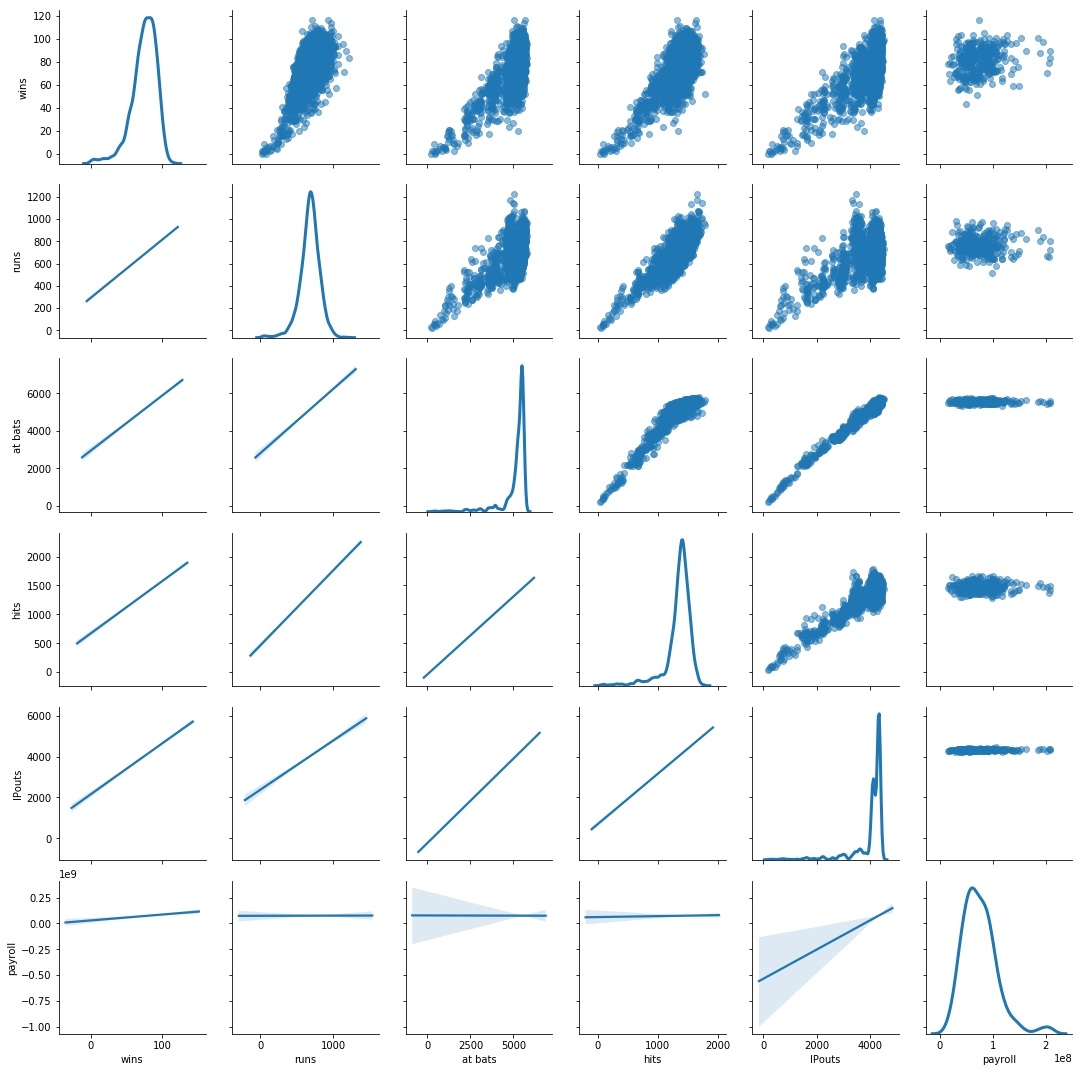

             wins      runs   at bats      hits    IPouts   payroll
wins     1.000000  0.677243  0.689233  0.725160  0.697276  0.200864
runs     0.677243  1.000000  0.618912  0.801701  0.519478  0.003616
at bats  0.689233  0.618912  1.000000  0.919542  0.984474 -0.000980
hits     0.725160  0.801701  0.919542  1.000000  0.862981  0.021461
IPouts   0.697276  0.519478  0.984474  0.862981  1.000000  0.160598
payroll  0.200864  0.003616 -0.000980  0.021461  0.160598  1.000000


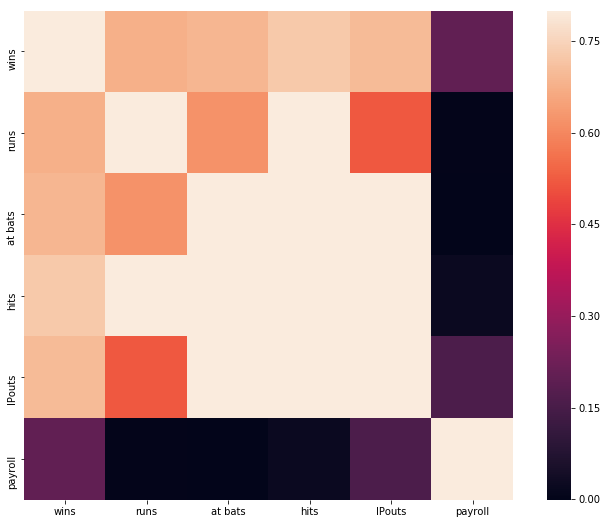

 wins :  runs         0.6772428758860841
 wins :  at bats      0.6892331736063761
 wins :  hits         0.725159672926023
 wins :  IPouts       0.6972759745520544
 wins :  payroll      0.20086416394438622


In [3]:

   # Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(plot_df, diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

# Make the correlation matrix.
corrmat = plot_df.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

 
for col in plot_df.loc[:,'runs':'payroll'].columns:
    print(" wins : ",'{0: <12}'.format(col),plot_df['wins'].corr(plot_df[col]))
    